In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,cross_val_predict,cross_validate
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn import impute

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading in train data (10000 observations)
train = pd.read_csv('train_subset.csv')

In [3]:
train = train.drop(['Unnamed: 0'],axis=1)

In [4]:
# read train target label data (response)
target = pd.read_csv('train_labels.csv')

In [5]:
# merge response + predictors in train data
train = pd.merge(train, target)

In [6]:
# evaluate predictor types
for col in train.columns:
  if train[col].dtype == 'O':
    print(col)


customer_ID
S_2
D_63
D_64


In [7]:
train.loc[:,['S_2', 'D_63', 'D_64']]

,S_2,D_63,D_64
0,2017-03-09,CR,O
1,2017-04-07,CR,O
2,2017-05-28,CR,O
3,2017-06-13,CR,O
4,2017-07-16,CR,O
...,...,...,...
9995,2018-02-26,CR,O
9996,2018-03-19,CR,O
9997,2017-03-28,CO,O
9998,2017-04-15,CO,O


In [8]:
train = train.drop(['S_2'],axis=1)

In [9]:
# reading in test data (10000 observations)
test = pd.read_csv('test_subset.csv')

In [10]:
test = test.drop(['Unnamed: 0', 'S_2'],axis=1)

In [11]:
# storing missing values for each column in train
val_train = train.isna().sum()

# storing missing values for each column in test
val_test = test.isna().sum()

In [12]:
# creating dataframe to store how many values are missing in each column for both train and test
na_df = pd.DataFrame(columns = train.columns)
na_df.loc['Train'] = val_train
na_df.loc['Test'] = val_test
na_df

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
Train,0.0,64.0,0.0,0.0,0.0,0.0,1752.0,0.0,0.0,8645.0,...,9628.0,9628.0,153.0,63.0,153.0,8428.0,153.0,63.0,153.0,0.0
Test,0.0,41.0,0.0,0.0,6.0,0.0,1672.0,6.0,6.0,8811.0,...,9706.0,9706.0,86.0,29.0,86.0,8189.0,86.0,29.0,86.0,NaN


In [13]:
# identify predictors with large number of missing values 
col_missing = []
for col in na_df.columns:
    if na_df.loc['Train',col]/10000 > .8:
        col_missing.append(col)
len(col_missing)

23

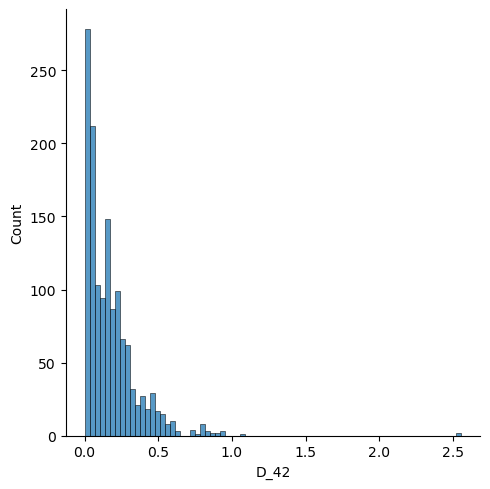

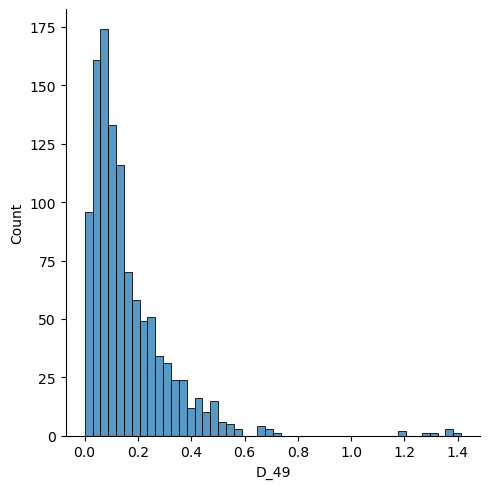

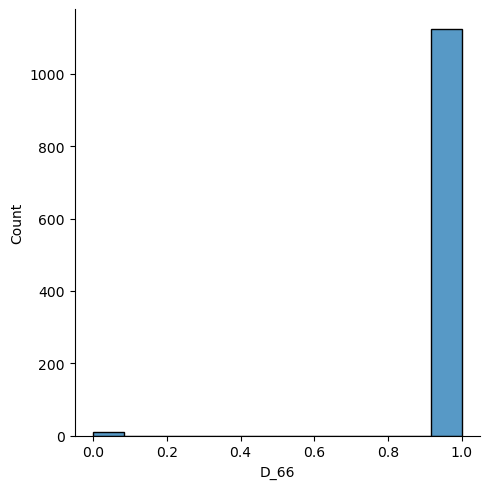

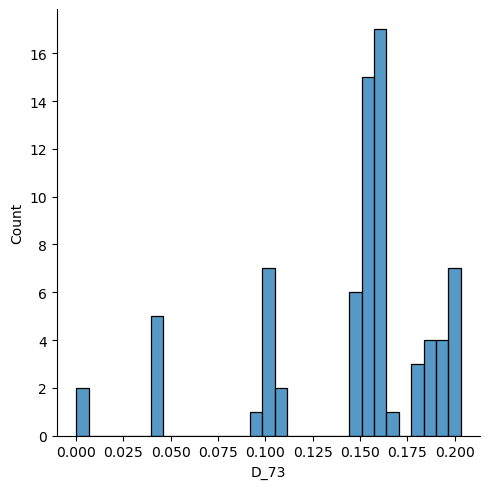

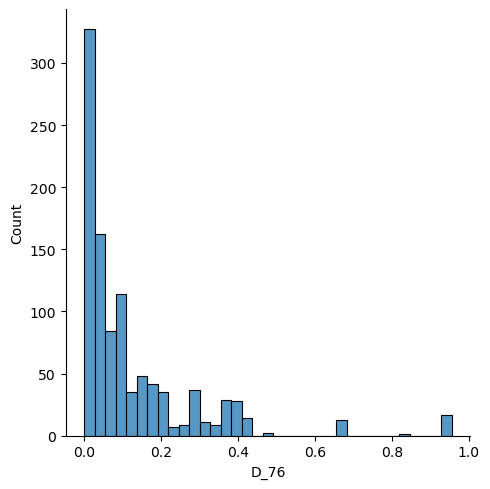

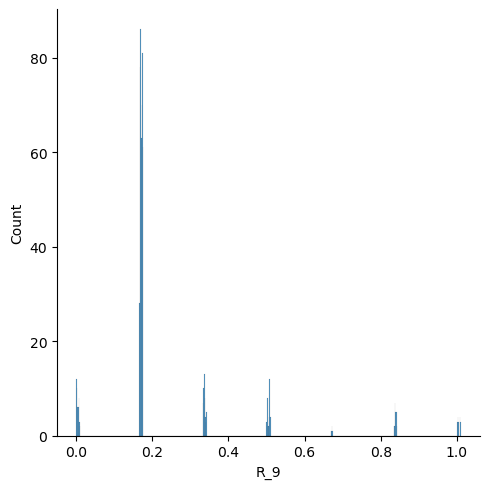

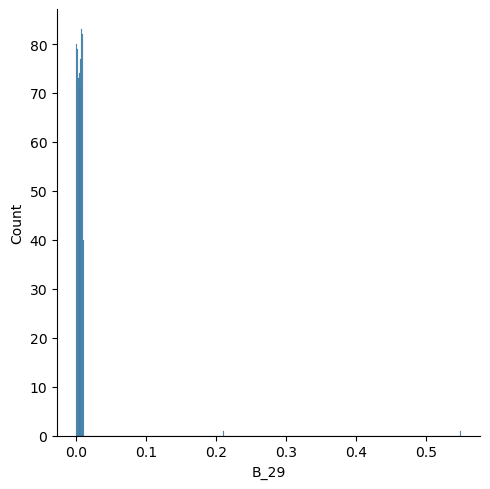

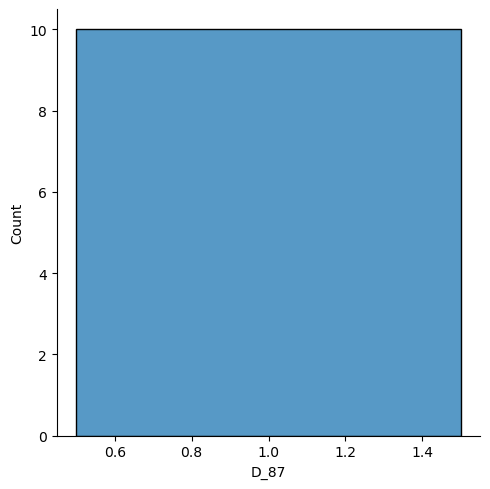

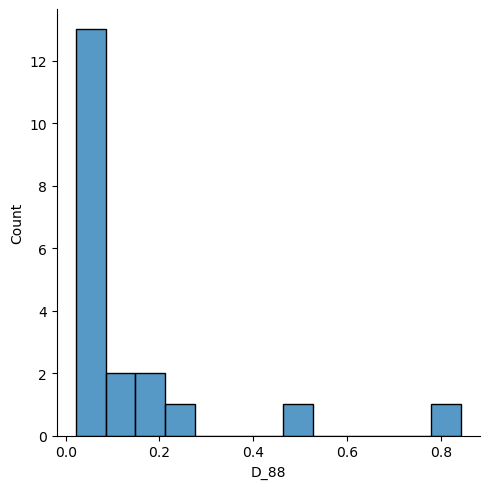

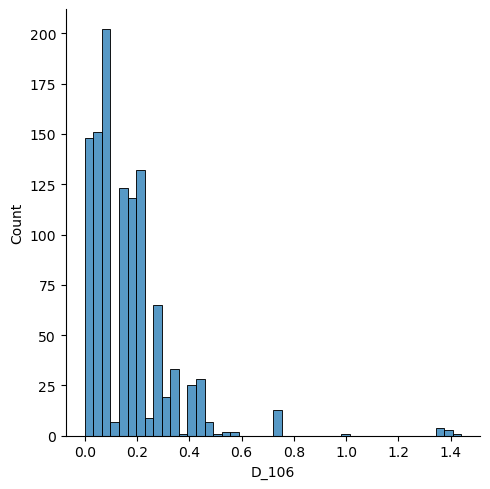

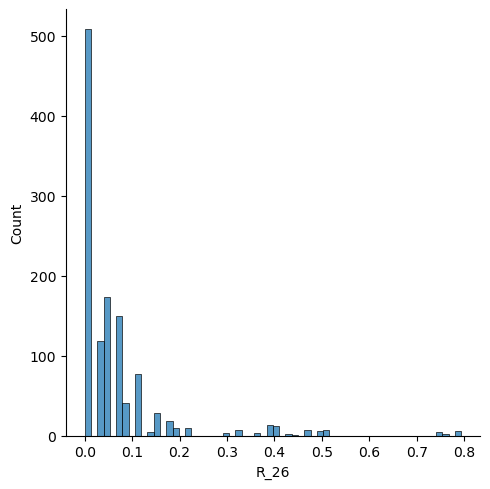

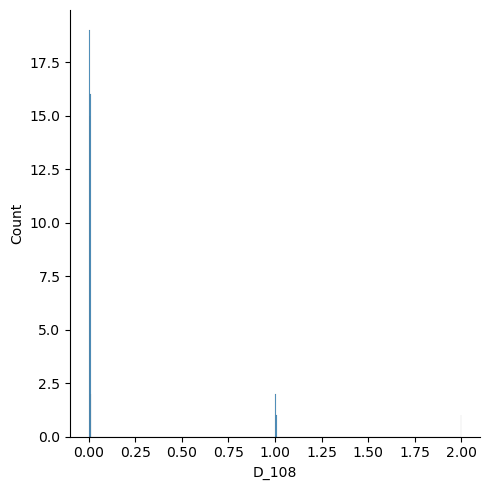

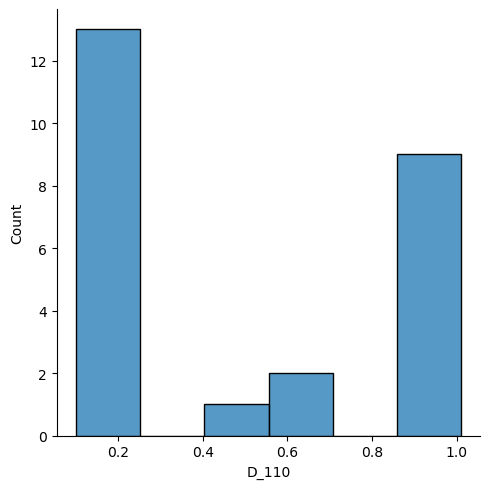

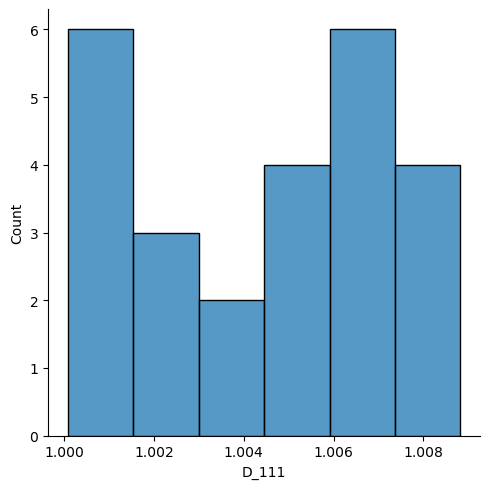

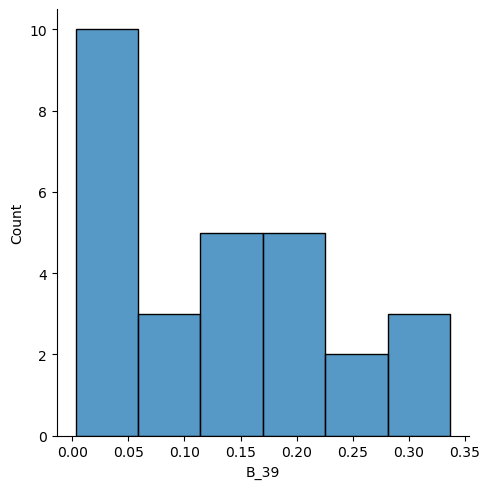

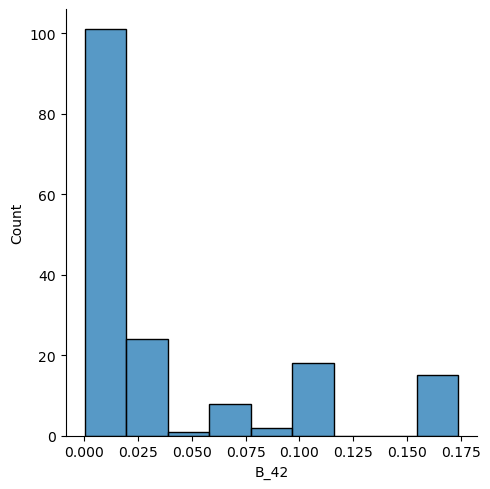

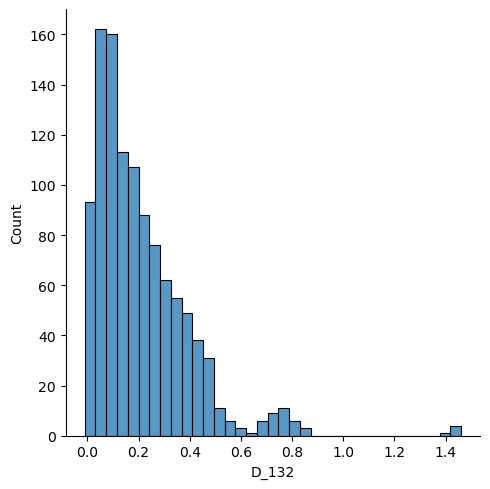

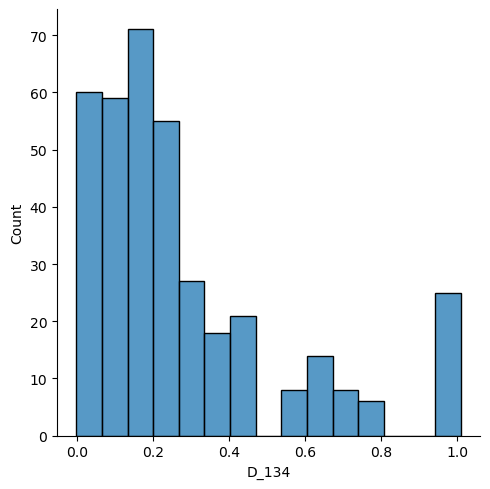

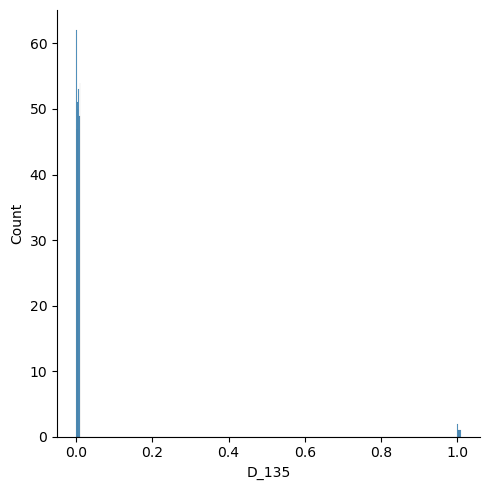

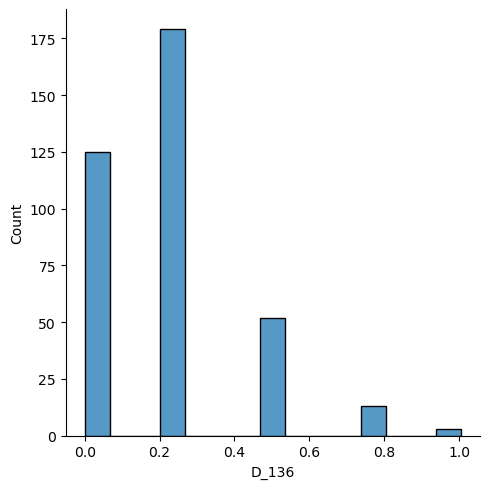

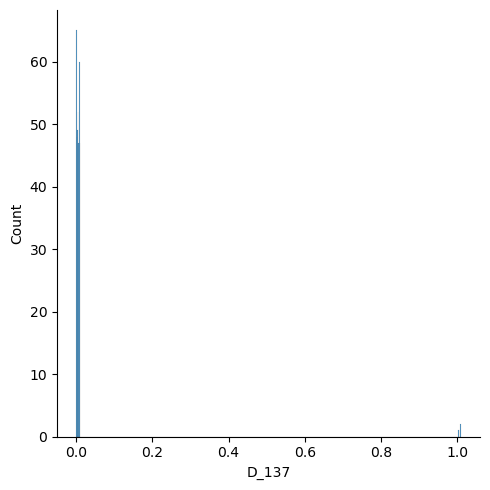

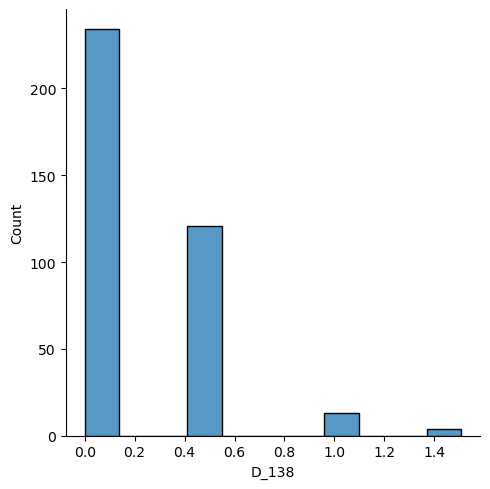

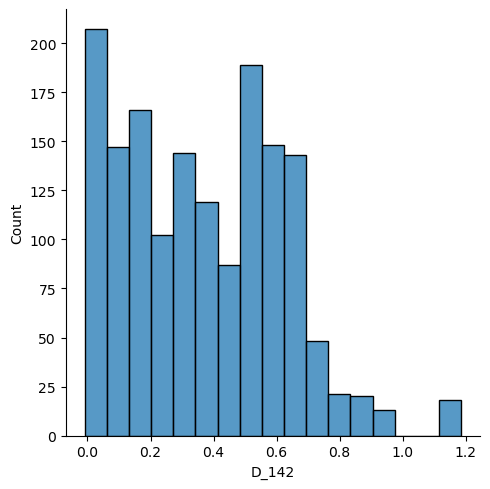

In [14]:
# visualize distribution of predictors with large number of missing values
for col in col_missing:
  sns.displot(train, x=col)

In [15]:
# drop predictors with more than 80% missing values
train = train.drop(col_missing,axis=1)

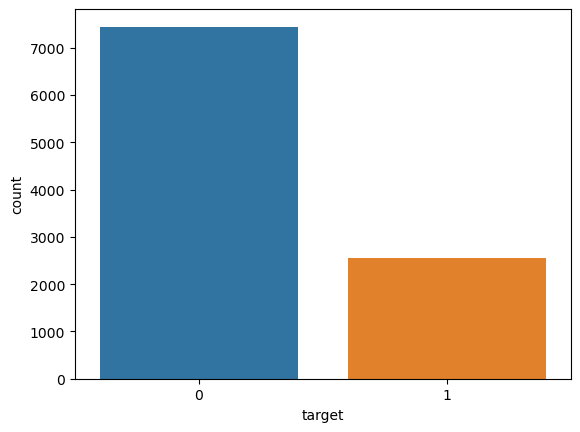

In [16]:
# visualize distribution of response 
sns.countplot(x = 'target', data = train);

In [17]:
# Proportion of 0 and 1s in response
train.target.value_counts(1)

0    0.7447
1    0.2553
Name: target, dtype: float64

ValueError: Could not interpret input 'D_66'

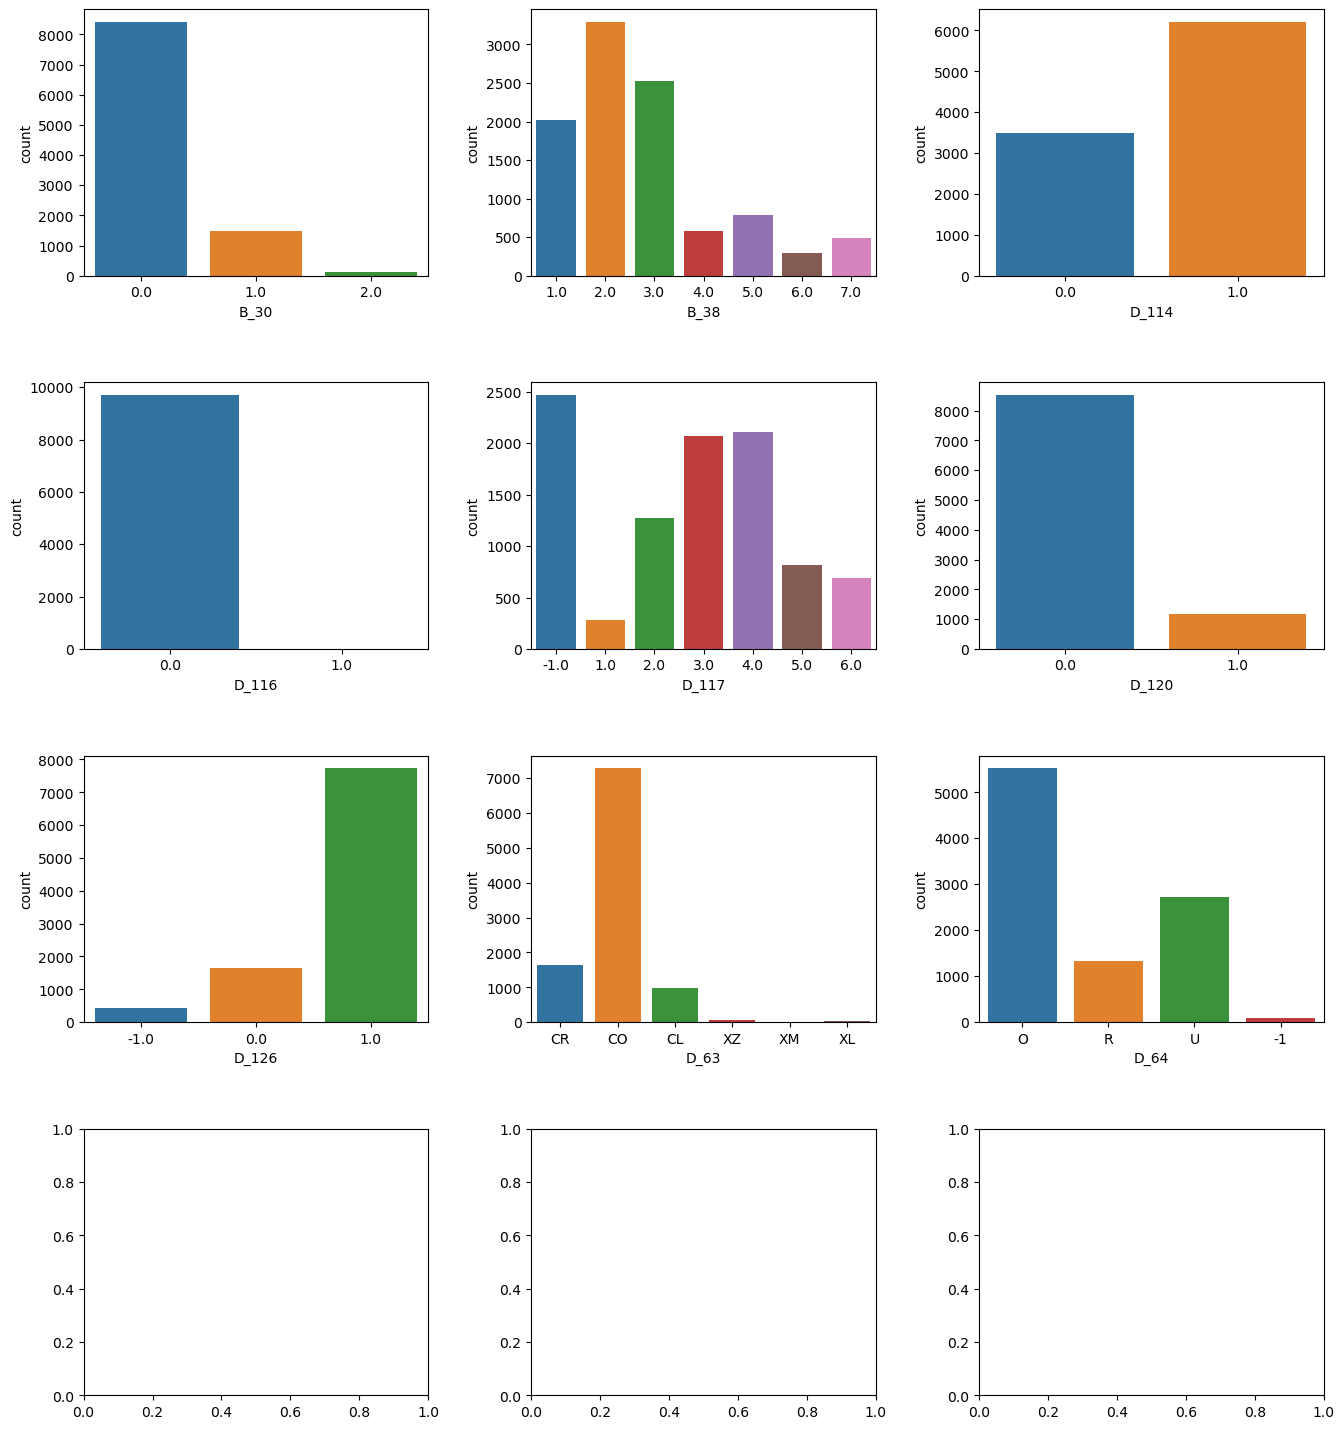

In [18]:
# Distribution of categorical variables 
fig, ax = plt.subplots(4, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=train, x ='B_30', ax=ax[0, 0]);
sns.countplot(data=train, x ='B_38', ax=ax[0, 1]);
sns.countplot(data=train, x ='D_114', ax=ax[0, 2]);
sns.countplot(data=train, x ='D_116', ax=ax[1, 0]);
sns.countplot(data=train, x ='D_117', ax=ax[1, 1]);
sns.countplot(data=train, x ='D_120', ax=ax[1, 2]);
sns.countplot(data=train, x ='D_126', ax=ax[2, 0]);
sns.countplot(data=train, x ='D_63', ax=ax[2, 1]);
sns.countplot(data=train, x ='D_64', ax=ax[2, 2]);
sns.countplot(data=train, x ='D_66', ax=ax[3, 0]);
sns.countplot(data=train, x ='D_68', ax=ax[3, 1]);

ValueError: Could not interpret input 'D_66'

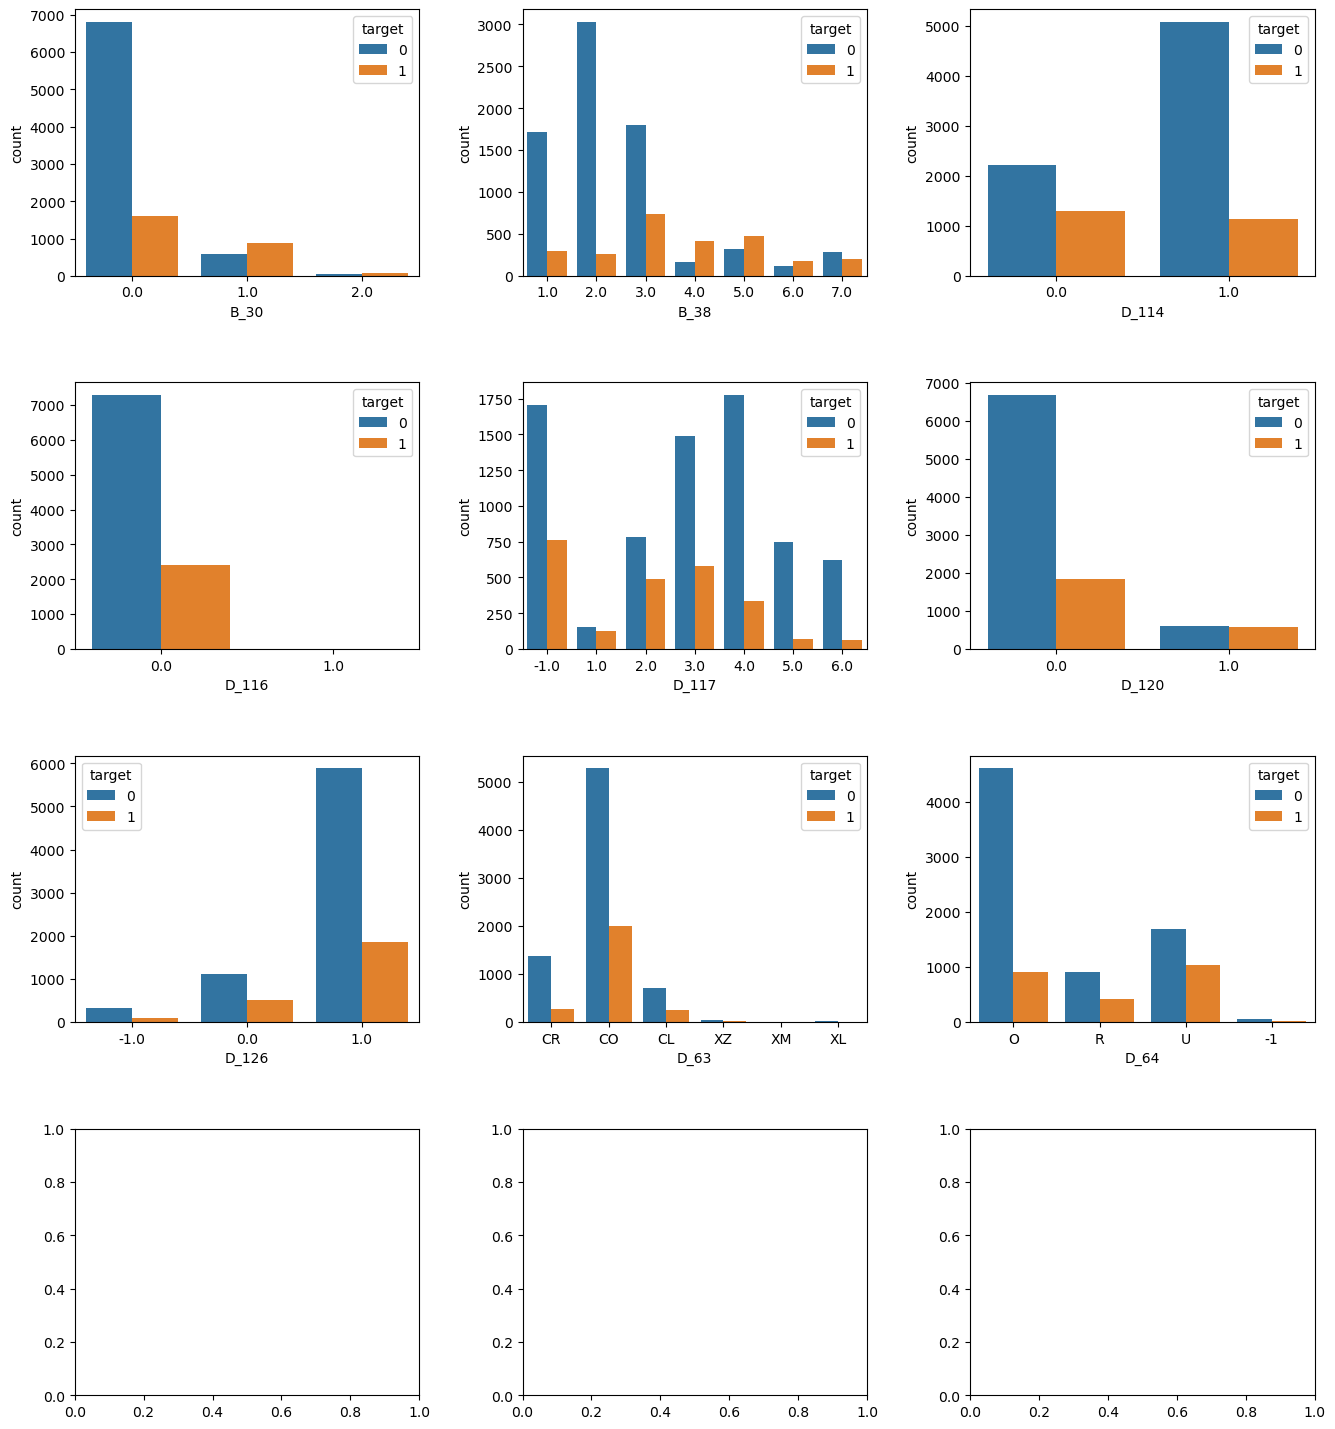

In [19]:
# Relationship between categorical variables and response
fig, ax = plt.subplots(4, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=train, x ='B_30', hue ='target', ax=ax[0, 0]);
sns.countplot(data=train, x ='B_38', hue ='target', ax=ax[0, 1]);
sns.countplot(data=train, x ='D_114', hue ='target', ax=ax[0, 2]);
sns.countplot(data=train, x ='D_116', hue ='target', ax=ax[1, 0]);
sns.countplot(data=train, x ='D_117', hue ='target', ax=ax[1, 1]);
sns.countplot(data=train, x ='D_120', hue ='target', ax=ax[1, 2]);
sns.countplot(data=train, x ='D_126', hue ='target', ax=ax[2, 0]);
sns.countplot(data=train, x ='D_63', hue ='target', ax=ax[2, 1]);
sns.countplot(data=train, x ='D_64', hue ='target', ax=ax[2, 2]);
sns.countplot(data=train, x ='D_66', hue ='target', ax=ax[3, 0]);
sns.countplot(data=train, x ='D_68', hue ='target', ax=ax[3, 1]);

In [87]:
# convert categorical variables to dummy variables
train = pd.get_dummies(train, columns = ['D_63', 'D_64'])
test = pd.get_dummies(test, columns = ['D_63', 'D_64'])

In [88]:
#separate predictors and response
y_train = train.target 
X_train = train.drop(['target', 'customer_ID'], axis=1)

In [93]:
#find optimal k to impute missing values
total_acc = []
k_values = [i for i in range(1, 51)]

# Number of missing values
missing_values = X_train.isna().sum().sum()

for k in k_values:
  weighted_avg_acc = []

  # Impute the missing values
  X_imputed_k = pd.DataFrame(impute.KNNImputer(n_neighbors = k).fit_transform(X_train), columns = X_train.columns)

  for p in X_train.columns:
    # p is a series

    if X_train[p].isna().sum() != 0:
      # If the predictor has missing values then remove the predictor from the full imputed table
      X_imputed_non_missing_k = X_imputed_k.loc[~X_train[p].isnull(),:]
      X_imputed_non_missing_k.reset_index(drop = True, inplace = True)
      # Remove the observations with missing values in the p column
      predictor_nonmissing = X_imputed_k.loc[~X_train[p].isnull(), p]

      # Cross_val_score
      knn_model = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
      cv_scores = cross_val_score(knn_model, X_imputed_non_missing_k, predictor_nonmissing, 
                                  cv = 5, scoring = 'accuracy')
      weighted_avg_acc.append(cv_scores.mean() * X_train[p].isna().sum())

    else:
      pass 

  total_acc.append((sum(weighted_avg_acc)/(X_train.isna().sum().sum())))
  # Sum(weighted_avg_mae) = total error
optimal_k = k_values[total_acc.index(min(total_acc))]

plt.plot(k_values, total_acc)
plt.xlabel('K')
plt.ylabel('Total Accuracy')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
#imputing missing values with 2 nearest neighbors, where the neighbors have equal weights

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=7)

#Use the object method 'fit_transform' to impute missing values
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns)